<img src="https://matplotlib.org/_static/logo2.svg" width = "550px" />

Odkazy:
*   https://matplotlib.org/ -- Hlavní stránka matplotlibu
*   [cheat sheets & handouts](https://github.com/matplotlib/cheatsheets#cheatsheets)
*   [gallery](https://matplotlib.org/stable/gallery/index.html) -- chcete nějaký graf a nevíte odkud začít...
*   [tutorials](https://matplotlib.org/stable/tutorials/index.html) -- elementární i pokročilé návody s vysvětlením



**matplotlib** je obsáhlá pythonovská knihovna pro vizualizaci dat, umožňující vytvářet statické, animované i interaktivní grafy a vizualizace. V rámci tohoto úvodního seznámení se budeme úmyslně dopouštět zjednodušování a některé věci cíleně vynecháme/zamlčíme.




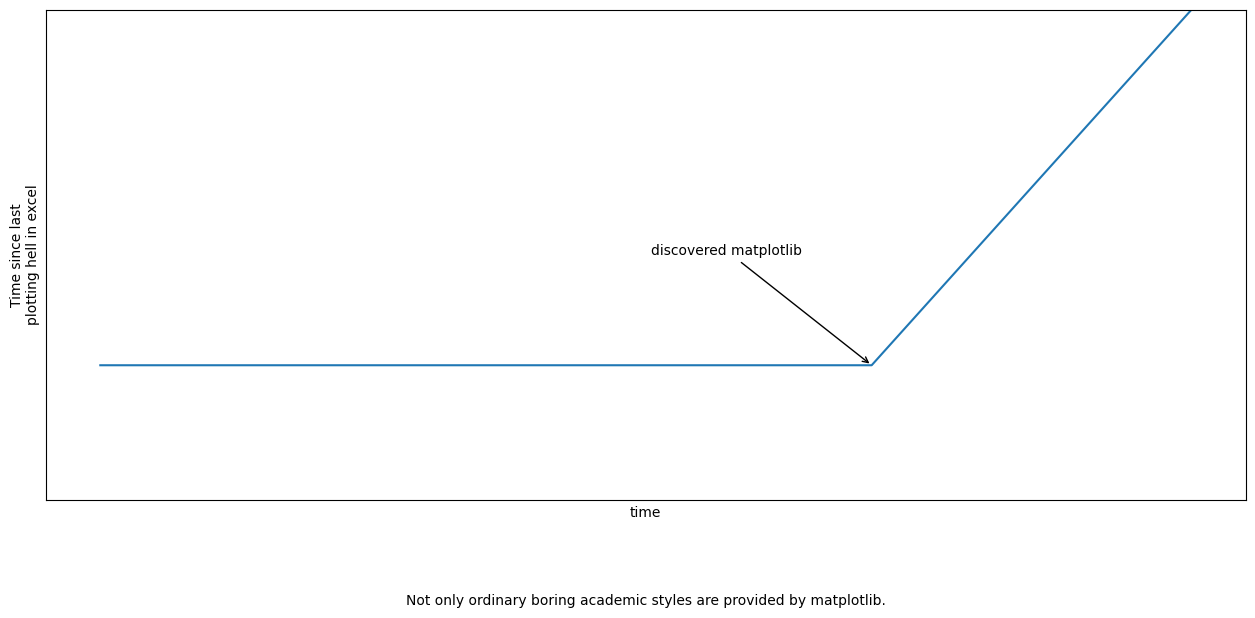

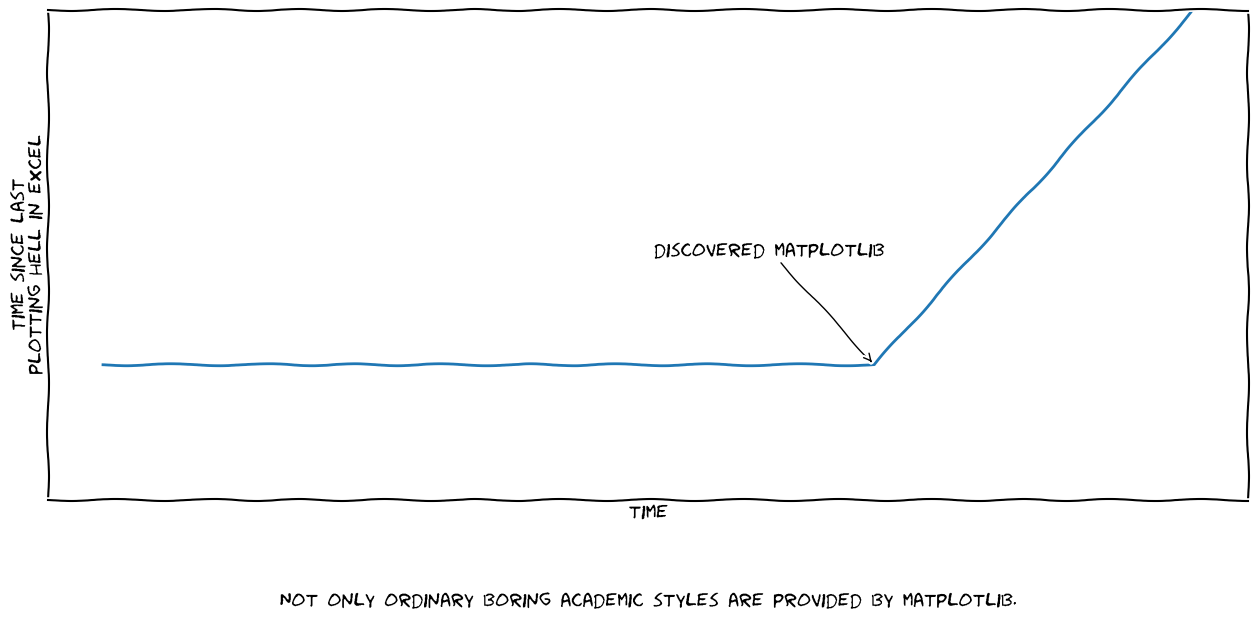

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plotit():
    fig = plt.figure(figsize=(15, 7))
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([-10, 30])
    data = np.ones(100)
    data[70:] += np.arange(30)
    ax.annotate('discovered matplotlib', xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(50, 10))
    ax.plot(data)
    ax.set_xlabel('time')
    ax.set_ylabel('Time since last\nplotting hell in excel')
    fig.text(0.5, 0.05,'Not only ordinary boring academic styles are provided by matplotlib.', ha='center')

plotit()

with plt.xkcd():
  plotit()

# Pojmy

**Figure** - objekt sdružující **Axes** (neplést s **Axis**), které lze chápat jako "to co se kreslí", **Artists** (titulky, legenda, anotace, křivky, atd.) a pro pořádek i objekt **canvas**.

**Axes** - obrazová reprezentace dat, to co kreslíme. Figure jich obsahuje typicky aspoň 1, často i více. Obsahuje obvykle 2 nebo 3 **Axis**, tedy osy, přes které nastavuje rozsah kreslené oblasti, popisky osy a hlavní a vedlejší značky. Pokud se budete pouštět do pokročilých triků s osami, budou vás dále zajímat pojmy Locator a Formatter.

**Artist** - prakticky vše co vidíte na figure (včetně Figure, Axes a Axis).

![anatomy.webp](https://matplotlib.org/stable/_images/anatomy.png)

(Zdroj obrázku [1])

# Vstupní data

Nemáte-li k tomu fakt dobrý důvod, krmte matplotlib vždy pomocí **numpy polí** (`numpy.array` nebo `numpy.ma.masked_array`).

Pandas DataFrame si na numpy pole převedeme:

```python
df = pandas.DataFrame(np.random.rand(4, 5), columns = list('abcde'))
npa = df.values
```

# Základy

U ukázek budeme střídat objektově orientovaný (OO) interface a pyplot interface. První jmenovaný vyžaduje explicitní vytváření figures, axes a volání metod nad nimi. Druhý nechává lecos na pyplotu, aby se postaral nějakým defaultním postupem za nás.


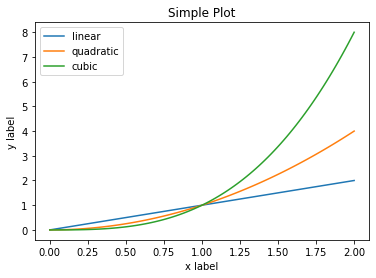

In [ ]:
# převzato z [1]
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()            # Create a figure and an axes.
ax.plot(x, x, label='linear')       # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic') # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')     # ... and some more.
ax.set_xlabel('x label')            # Add an x-label to the axes.
ax.set_ylabel('y label')            # Add a y-label to the axes.
ax.set_title("Simple Plot")         # Add a title to the axes.
ax.legend()                         # Add a legend.

Často se nám hodí nějakou část kreslení vyčlenit do funkce, protože ji potřebuje opakovat s různými vstupními daty a kreslit například přes sebe, nebo do vícero **subplotů**.

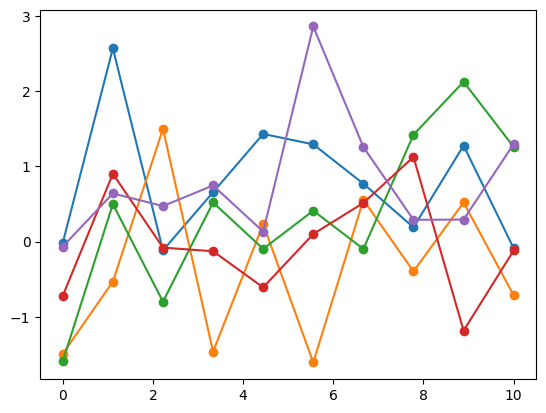

In [ ]:
def drawit(ax, data):
  x = np.linspace(0, 10, data.shape[0])
  return ax.plot(x, data, marker='o')

fig, ax = plt.subplots(1, 1)
for _ in range(5):
  drawit(ax, np.random.randn(10))

**Backend** je něco, co se postará o vykreslení vhodného výstupního formátu a matplotlib si vybere ten správný za vás. Řešit to bude třeba až ve chvíli, kdy budete chtít danou grafiku embeddovat například do vašeho GUI, webstránky, nebo využívat features, které ten defaultně vybraný backend nepodporuje.

Ve většině případů taky budete používat interaktivní mód, kdy kód programu pokračuje po vykreslení grafiky dál (např. zde v collab notebooku, ipython consoli, jupyter notebooku atd.). Grafika je vykreslována v samostatném okně (při spuštění z CLI), ale umí být i automaticky vkládána (interaktivní notebooky, ipython) přímo do konzole. Většina backendů s podporou interaktivního módu překreslí figure při updatu Axes (pokud ne, je nutno volat `plt.draw()`).

**Pokud vaše prostředí nepoužívá matplotlib v interaktivním módu je pro zobrazení nutné zavolat ještě `plt.show()`.**

# Výkon
Pro různé rychlé náhledy na velká data se může hodit zabrousit i do pokročilého nastavování parametrů (prozkoumejte slovník `matplotlib.rcParams`). Vcelku rozumně matplotlib kreslí cca do 2-5M hodnot pomocí **line** na běžném pc.

Lze snadno zjednodušit linie, kreslit jen některé markery (`.plot(..., markevery=10)`), případně matplotlibu ušetřit práci specifikací, kde má být legenda (výpočet při `loc='best'` je dost náročný).

Data je pochopitelně možno redukovat ještě před kreslením (`scipy.signal.resample`, `scipy.signal.decimate`, numpy slicing, ...).

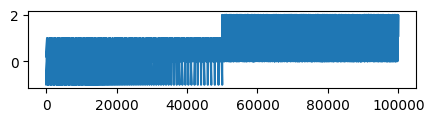

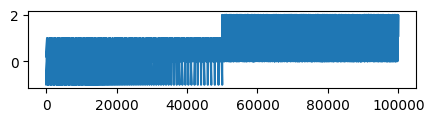

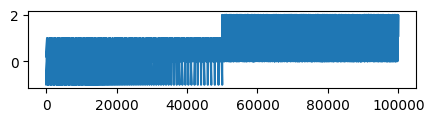

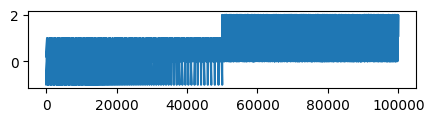

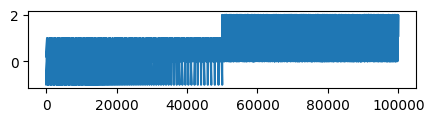

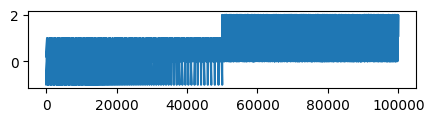

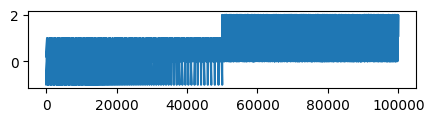

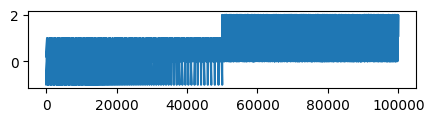

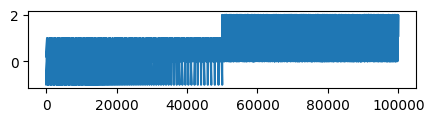

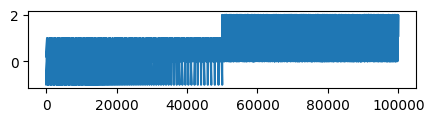

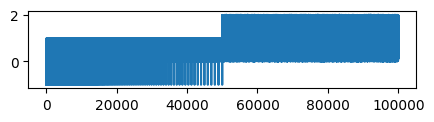

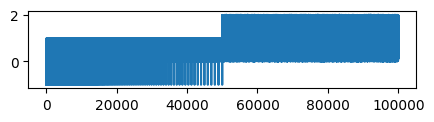

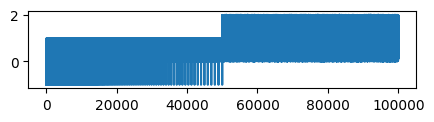

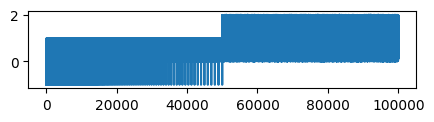

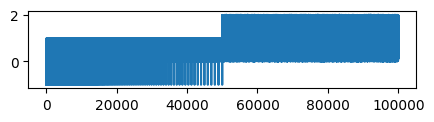

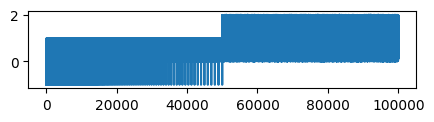

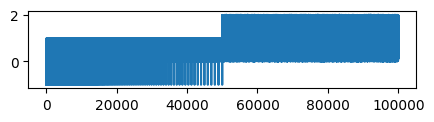

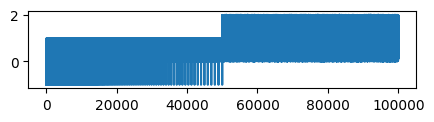

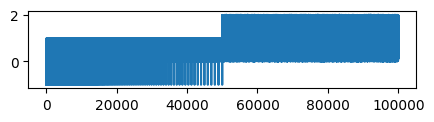

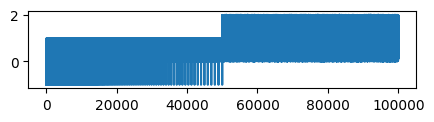

Threshold=1.0 -> 2.019997030000013 s
Threshold=0.0 -> 4.727153592999912 s
module://matplotlib_inline.backend_inline


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import timeit


def plot(simplify_thresh):
  mpl.rcParams['path.simplify_threshold'] = simplify_thresh
  plt.figure(figsize=(5, 1))
  plt.plot(y)
  plt.show()

# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.geomspace(10, 50000, 400).astype(int)] = -1
mpl.rcParams['path.simplify'] = True

a = timeit.timeit("plot(1.0)", number=10, setup="from __main__ import plot")
b = timeit.timeit("plot(0.0)", number=10, setup="from __main__ import plot")

print(f'Threshold=1.0 -> {a} s\nThreshold=0.0 -> {b} s')
print(mpl.rcParams["backend"])

# 2D grafika


(629,) (6,) [0.         1.25663706 2.51327412 3.76991118 5.02654825 6.28318531]


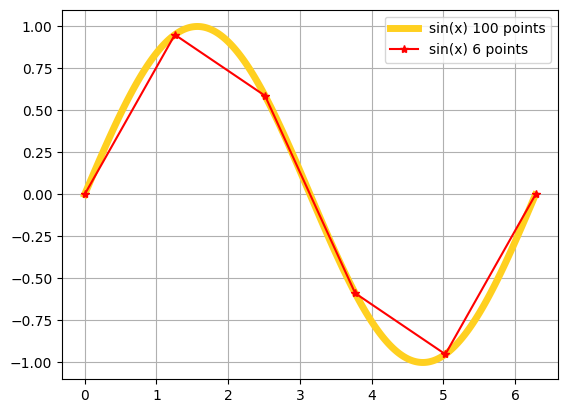

In [ ]:
import math
x = np.arange(0.0, 2*math.pi, 0.01)  # starting point, end point, step
y = np.sin(x)
x2 = np.linspace(0.0, 2*math.pi, 6)  # starting point, end point, # of steps
y2 = np.sin(x2)

print(x.shape, x2.shape, x2)

fig, ax = plt.subplots(1, 1)
ax.plot(x, y, label='sin(x) 100 points', color="#FFD020", lw=5)
ax.plot(x2, y2, label='sin(x) 6 points', color="#FF0000", marker='*')
ax.grid()
ax.legend()

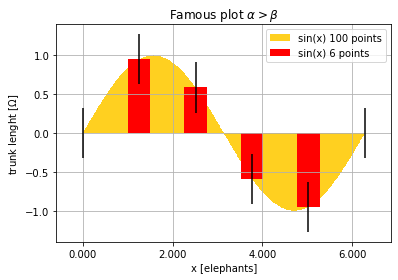

In [ ]:
# lebels, errorboxes, LaTeX, ticks, ticks labels
std = np.std(y2) * 0.5
fig, ax = plt.subplots(1, 1)
ax.bar(x, y, label='sin(x) 100 points', width=0.01, color="#FFD020")
ax.bar(x2, y2, label='sin(x) 6 points', width=0.5, color="#FF0000", yerr=std)  # with error
ax.set_xticks([0, 2, 4, 6])
ax.set_xticklabels([f'{lab:.3f}' for lab in [0, 2, 4, 6]])
ax.set_xlabel('x [elephants]')
ax.set_ylabel(r'trunk lenght [$\Omega$]')  # supports LaTeX notation in raw strings (r'str')
ax.set_title(r'Famous plot $\alpha > \beta$')
ax.grid()
ax.legend()

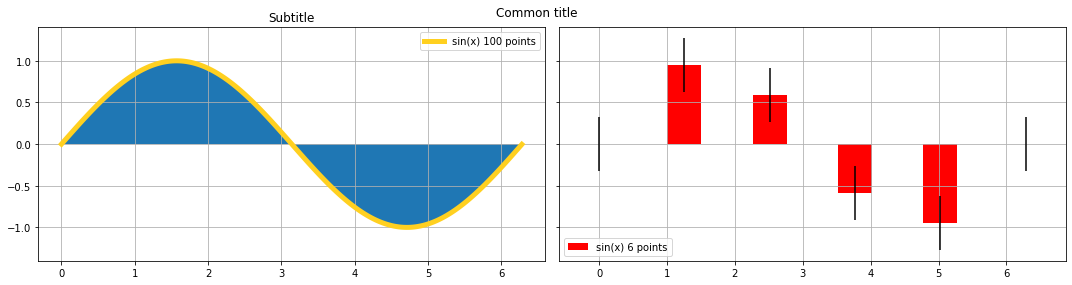

In [ ]:
# subplots, common Y-axis, errorbars
fig, ax = plt.subplots(1, 2, figsize=(15, 4), sharey=True, tight_layout=True)
fig.suptitle('Common title')
ax[0].plot(x, y, label='sin(x) 100 points', color="#FFD020", lw=5)
ax[0].set_title('Subtitle')
ax[0].fill_between(x, y, 0)
ax[0].grid()
ax[0].legend()
ax[1].bar(x2, y2, label='sin(x) 6 points', width=0.5, color="#FF0000", yerr=std)  # with errors
ax[1].grid()
ax[1].legend(loc='lower left')

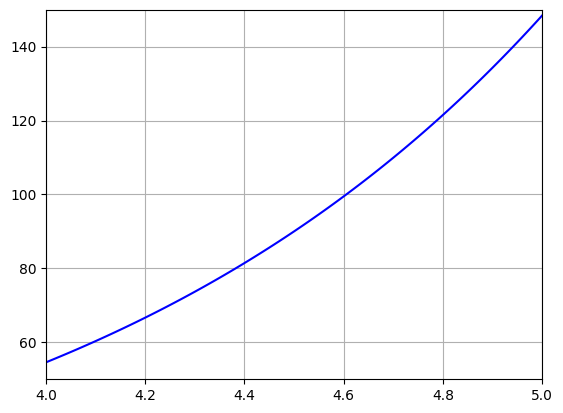

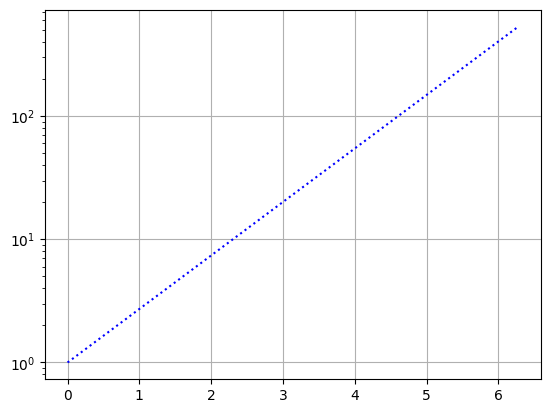

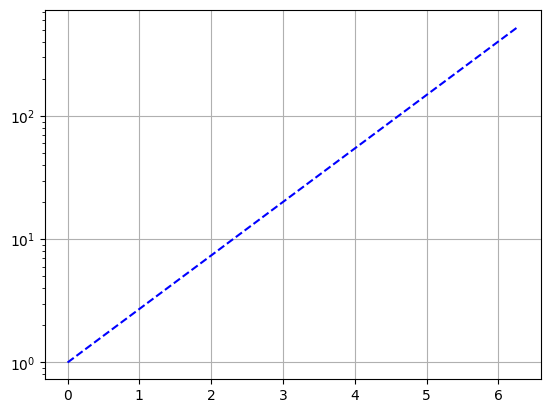

In [ ]:
# logscale, linestyle
# dalsi: https://matplotlib.org/stable/gallery/scales/log_demo.html
y = np.exp(x)

fig, ax = plt.subplots(1, 1)
ax.plot(x, y, color="blue")
ax.set_xlim(4, 5)
ax.set_ylim(50, 150)
ax.grid()

fig, ax = plt.subplots(1, 1)
ax.plot(x, y, color="blue", ls=':')
ax.set_yscale('log')  # {"linear", "log", "symlog", "logit", ...}
ax.grid()

fig, ax = plt.subplots(1, 1)
ax.plot(x, y, color="blue", ls='--')
ax.semilogy()  # internaly uses Axes.set_yscale()
ax.grid()

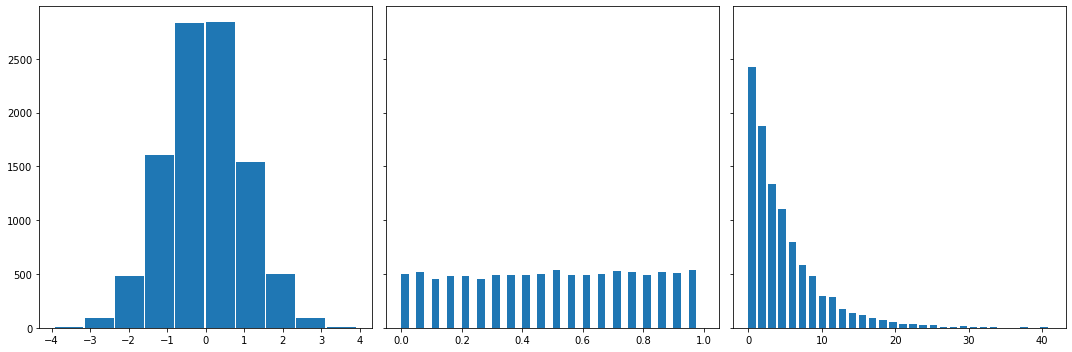

In [ ]:
# histograms
N = 10000
np.random.seed(42)
x1 = np.random.randn(N)
x2 = np.random.uniform(0, 1, N)
x3 = np.random.exponential(5, N)

fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True, tight_layout=True)
ax[0].hist(x1, width=0.75, bins=10)
ax[1].hist(x2, width=0.025, bins=20)
ax[2].hist(x3, width=1, bins=30)
plt.show()

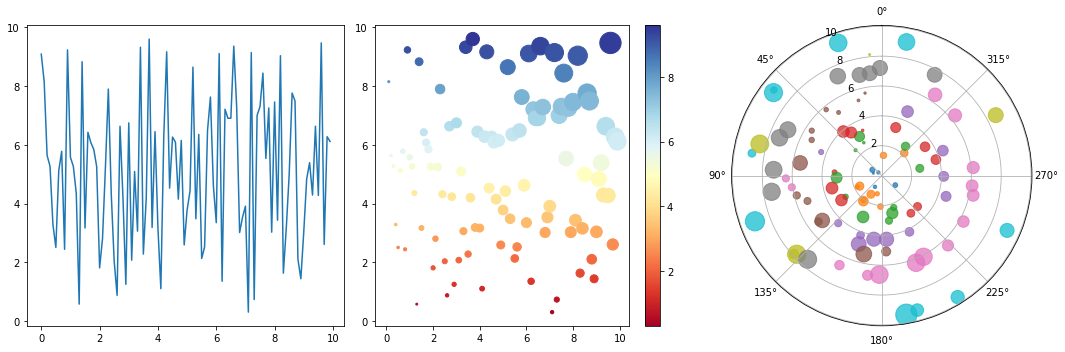

In [ ]:
# scatter, color mappings, polar
cm = plt.cm.get_cmap('RdYlBu')
cm2 = plt.cm.get_cmap('tab10')

x = np.arange(0, 10, 0.1)
y = np.random.uniform(0, 10, x.shape[0])

fig, ax = plt.subplots(1, 3, figsize=(15, 5), tight_layout=True)
ax[0].plot(x, y)
scatter = ax[1].scatter(x, y, c=y, s=x*y*5, cmap=cm)  # set marker color and size, apply colormap
fig.colorbar(scatter, ax=ax[1])

ax[2] = plt.subplot('133', projection='polar')  # override 3rd axes with new one with polar projection
c = ax[2].scatter(x, y, c=y, s=x*y*5, cmap=cm2, alpha=0.75)
ax[2].set_rorigin(0)
ax[2].set_theta_zero_location('N', offset=0)


(-1.0999960278547087,
 1.099996027854709,
 -1.0999966533504741,
 1.099999840635737)

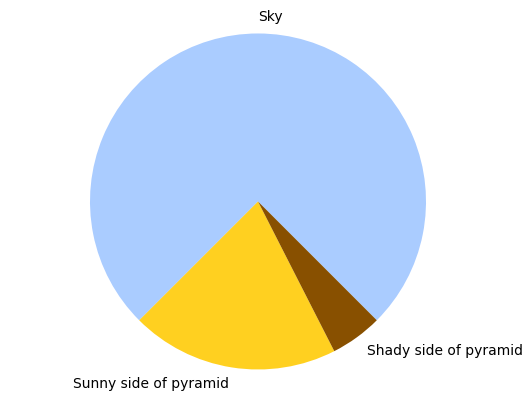

In [ ]:
# pie chart
labels = 'Sky', 'Sunny side of pyramid', 'Shady side of pyramid'
sizes = [75, 20, 5]
colors = ['#AACCFF', '#FFD020', '#885000']
fig, ax = plt.subplots()
ax.pie(sizes, colors=colors, labels=labels, startangle=-45)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

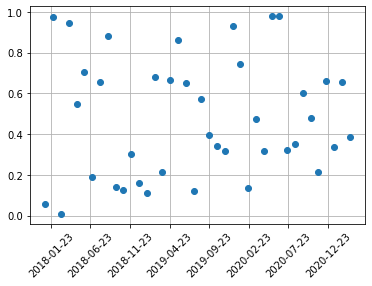

In [ ]:
# date axes
import matplotlib.pyplot as plt
from matplotlib.dates import MONTHLY, DateFormatter, rrulewrapper, RRuleLocator, drange
import numpy as np
import datetime

loc = RRuleLocator(rrulewrapper(MONTHLY, interval=5))
formatter = DateFormatter('%Y-%m-%d')
date1 = datetime.date(2018, 1, 1)
date2 = datetime.date(2021, 4, 15)
delta = datetime.timedelta(days=30)
dates = drange(date1, date2, delta)
s = np.random.rand(len(dates))

fig, ax = plt.subplots()
plt.plot_date(dates, s)
ax.grid()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=45, labelsize=10)

# Rastrová data
Kreslit můžeme pochopitelně i rastrová data (obrázky). Zdrojem jsou pak 2D ("černobílé") i 3D (s více barevnými kanály) matice hodnot.

**POZOR: Pro `imshow()` je bod [0, 0] vlevo nahoře!**

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


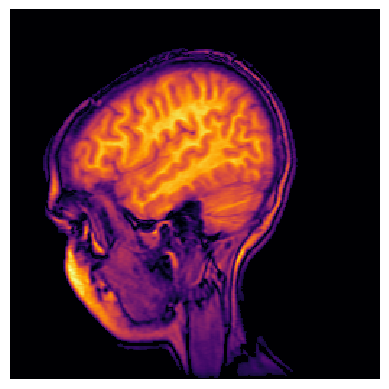

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import numpy as np

# Data are 256x256 16 bit integers.
with cbook.get_sample_data('s1045.ima.gz') as dfile:
    im = np.frombuffer(dfile.read(), np.uint16).reshape((256, 256))

print(im)
fig, ax = plt.subplots()
ax.imshow(im, cmap="inferno", interpolation='nearest')
_ = ax.axis('off')

Pokud máte málo dat (řídkou matici) a nechcete mít "pixely" velké třeba 30 px, je možno kreslit interpolovaně: https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html#interpolations-for-imshow
Nebo použít `pcolormesh()` - **pro něj je [0, 0] vlevo dole!**).

Všimněte si parametru `rasterized=True`, který se stará o to, že v případě, že výslednou grafiku ukládáte jako vektor, tak každý pixel je samostatný objekt a například FHD obraz 1920×1080 px pak má v PDF klidně 60 MB.

total 56
drwxr-xr-x 1 root root  4096 May  9 14:43 .
drwxr-xr-x 1 root root  4096 May  9 13:50 ..
-rw-r--r-- 1 root root 39700 May  9 14:44 aaa.pdf
drwxr-xr-x 4 root root  4096 May  5 23:26 .config
drwxr-xr-x 1 root root  4096 May  5 23:27 sample_data


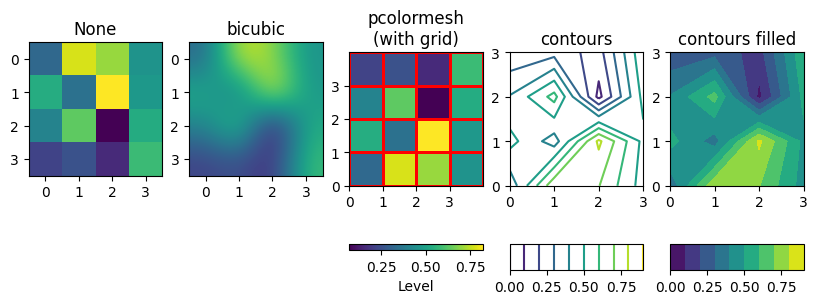

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

grid = np.random.rand(4, 4)
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10, 5),
                        subplot_kw={'xticks': [0, 1, 2, 3], 'yticks': [0, 1, 2, 3]})

for ax, interp_method in zip(axs.flat, [None, 'bicubic']):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

p = axs[2].pcolormesh(grid, edgecolors='#FF0000', linewidths=2, rasterized=True)
axs[2].set_title('pcolormesh\n(with grid)')
axs[2].set_aspect('equal')

# contours = vrstevnice
c1 = axs[3].contour(grid)
axs[3].set_title('contours')
axs[3].set_aspect('equal')

# contours filled
c2 = axs[4].contourf(grid)
axs[4].set_title('contours filled')
axs[4].set_aspect('equal')

fig.colorbar(p, ax=axs[2], ticks=np.arange(0, 1.01, 0.25), orientation='horizontal', label='Level')
fig.colorbar(c1, ax=axs[3], ticks=np.arange(0, 1.01, 0.25), orientation='horizontal', aspect=5)
fig.colorbar(c2, ax=axs[4], ticks=np.arange(0, 1.01, 0.25), orientation='horizontal', aspect=5)

plt.savefig("aaa.pdf", dpi=300)
!ls -la

DONE:
*   line, logscale, scatter, bars, histogram, pie, polar
*   multiple subplots
*   legend, LaTeX in titles
*   date axes
*   imshow, heatmaps, pcolormesh, contour

TODO?
*   text, annotate, patch?,
*   export (png, svg, latex?)


# 3D grafika

*   Surface3d
*   Položka seznamu



# Reference
[1] https:/
/matplotlib.org/stable/tutorials/introductory/usage.html